In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import KNNImputer

In [5]:
file_path = r"C:\Users\abirf\OneDrive\Desktop\privaterentalmarketstatistics231220.xls"

In [7]:
df = pd.read_excel(file_path, sheet_name="Table2.3", skiprows=6)

In [9]:
df = df.iloc[1:357].reset_index(drop=True)

In [11]:
df

,Unnamed: 0,LA Code1,Area Code1,Area,Count of rents,Mean,Lower quartile,Median,Upper quartile
0,NaN,NaN,E12000001,NORTH EAST,2040.0,496.0,395,450.0,550
1,NaN,1355.0,E06000047,County Durham UA,260.0,421.0,338,380.0,450
2,NaN,1350.0,E06000005,Darlington UA,270.0,416.0,350,400.0,475
3,NaN,724.0,E06000001,Hartlepool UA,90.0,411.0,395,425.0,440
4,NaN,734.0,E06000002,Middlesbrough UA,80.0,469.0,425,450.0,500
...,...,...,...,...,...,...,...,...,...
351,NaN,NaN,E10000027,Somerset,970.0,598.0,525,600.0,651
352,NaN,3305.0,E07000187,Mendip,180.0,650.0,595,650.0,700
353,NaN,3310.0,E07000188,Sedgemoor,110.0,596.0,520,593.0,630
354,NaN,3330.0,E07000246,Somerset West and Taunton,180.0,638.0,575,635.0,700


In [13]:
df_clean = df.drop(columns=['Unnamed: 0'], errors='ignore')

In [15]:
df_clean

,LA Code1,Area Code1,Area,Count of rents,Mean,Lower quartile,Median,Upper quartile
0,NaN,E12000001,NORTH EAST,2040.0,496.0,395,450.0,550
1,1355.0,E06000047,County Durham UA,260.0,421.0,338,380.0,450
2,1350.0,E06000005,Darlington UA,270.0,416.0,350,400.0,475
3,724.0,E06000001,Hartlepool UA,90.0,411.0,395,425.0,440
4,734.0,E06000002,Middlesbrough UA,80.0,469.0,425,450.0,500
...,...,...,...,...,...,...,...,...
351,NaN,E10000027,Somerset,970.0,598.0,525,600.0,651
352,3305.0,E07000187,Mendip,180.0,650.0,595,650.0,700
353,3310.0,E07000188,Sedgemoor,110.0,596.0,520,593.0,630
354,3330.0,E07000246,Somerset West and Taunton,180.0,638.0,575,635.0,700


In [17]:
df_clean = df_clean.rename(columns={"Area Code1": "Area Code", "LA Code1": "LA Code"})

In [19]:
df_clean

,LA Code,Area Code,Area,Count of rents,Mean,Lower quartile,Median,Upper quartile
0,NaN,E12000001,NORTH EAST,2040.0,496.0,395,450.0,550
1,1355.0,E06000047,County Durham UA,260.0,421.0,338,380.0,450
2,1350.0,E06000005,Darlington UA,270.0,416.0,350,400.0,475
3,724.0,E06000001,Hartlepool UA,90.0,411.0,395,425.0,440
4,734.0,E06000002,Middlesbrough UA,80.0,469.0,425,450.0,500
...,...,...,...,...,...,...,...,...
351,NaN,E10000027,Somerset,970.0,598.0,525,600.0,651
352,3305.0,E07000187,Mendip,180.0,650.0,595,650.0,700
353,3310.0,E07000188,Sedgemoor,110.0,596.0,520,593.0,630
354,3330.0,E07000246,Somerset West and Taunton,180.0,638.0,575,635.0,700


In [21]:
df_clean = df_clean[df_clean["LA Code"].notna()].reset_index(drop=True)

In [23]:
df_clean

,LA Code,Area Code,Area,Count of rents,Mean,Lower quartile,Median,Upper quartile
0,1355.0,E06000047,County Durham UA,260.0,421.0,338,380.0,450
1,1350.0,E06000005,Darlington UA,270.0,416.0,350,400.0,475
2,724.0,E06000001,Hartlepool UA,90.0,411.0,395,425.0,440
3,734.0,E06000002,Middlesbrough UA,80.0,469.0,425,450.0,500
4,2935.0,E06000057,Northumberland UA,150.0,434.0,375,425.0,478
...,...,...,...,...,...,...,...,...
308,1630.0,E07000083,Tewkesbury,100.0,620.0,540,600.0,695
309,3305.0,E07000187,Mendip,180.0,650.0,595,650.0,700
310,3310.0,E07000188,Sedgemoor,110.0,596.0,520,593.0,630
311,3330.0,E07000246,Somerset West and Taunton,180.0,638.0,575,635.0,700


In [25]:
df_clean.isna().sum()

LA Code           0
Area Code         0
Area              0
Count of rents    0
Mean              0
Lower quartile    0
Median            0
Upper quartile    0
dtype: int64

In [27]:
df_sorted = df_clean.sort_values("Mean", ascending=False)

In [29]:
df_sorted

,LA Code,Area Code,Area,Count of rents,Mean,Lower quartile,Median,Upper quartile
193,5600.0,E09000020,Kensington and Chelsea,940.0,2425.0,1885,2201.0,2687
200,5990.0,E09000033,Westminster,650.0,2384.0,1895,2275.0,2708
188,5030.0,E09000001,City of London,60.0,2137.0,1750,2058.0,2492
192,5570.0,E09000019,Islington,450.0,1804.0,1500,1750.0,2000
187,5210.0,E09000007,Camden,570.0,1785.0,1430,1725.0,2050
...,...,...,...,...,...,...,...,...
13,2373.0,E06000009,Blackpool UA,430.0,425.0,390,412.0,450
37,2330.0,E07000120,Hyndburn,70.0,424.0,375,425.0,475
0,1355.0,E06000047,County Durham UA,260.0,421.0,338,380.0,450
1,1350.0,E06000005,Darlington UA,270.0,416.0,350,400.0,475


In [31]:
top_10 = df_sorted.sort_values('Mean', ascending=False).head(10)
bottom_10 = df_sorted.sort_values('Mean', ascending=True).head(10)

In [33]:
top_10

,LA Code,Area Code,Area,Count of rents,Mean,Lower quartile,Median,Upper quartile
193,5600.0,E09000020,Kensington and Chelsea,940.0,2425.0,1885,2201.0,2687
200,5990.0,E09000033,Westminster,650.0,2384.0,1895,2275.0,2708
188,5030.0,E09000001,City of London,60.0,2137.0,1750,2058.0,2492
192,5570.0,E09000019,Islington,450.0,1804.0,1500,1750.0,2000
187,5210.0,E09000007,Camden,570.0,1785.0,1430,1725.0,2050
198,5900.0,E09000030,Tower Hamlets,510.0,1738.0,1495,1650.0,1935
190,5390.0,E09000013,Hammersmith and Fulham,420.0,1686.0,1350,1600.0,1890
189,5360.0,E09000012,Hackney,370.0,1679.0,1370,1620.0,1900
194,5660.0,E09000022,Lambeth,380.0,1627.0,1390,1550.0,1800
199,5960.0,E09000032,Wandsworth,590.0,1594.0,1400,1575.0,1701


In [35]:
bottom_10

,LA Code,Area Code,Area,Count of rents,Mean,Lower quartile,Median,Upper quartile
2,724.0,E06000001,Hartlepool UA,90.0,411.0,395,425.0,440
1,1350.0,E06000005,Darlington UA,270.0,416.0,350,400.0,475
0,1355.0,E06000047,County Durham UA,260.0,421.0,338,380.0,450
37,2330.0,E07000120,Hyndburn,70.0,424.0,375,425.0,475
13,2373.0,E06000009,Blackpool UA,430.0,425.0,390,412.0,450
34,2315.0,E07000117,Burnley,40.0,426.0,365,420.0,495
18,905.0,E07000026,Allerdale,130.0,426.0,350,425.0,475
20,915.0,E07000028,Carlisle,170.0,427.0,375,418.0,460
4,2935.0,E06000057,Northumberland UA,150.0,434.0,375,425.0,478
106,3010.0,E07000171,Bassetlaw,70.0,435.0,375,418.0,450


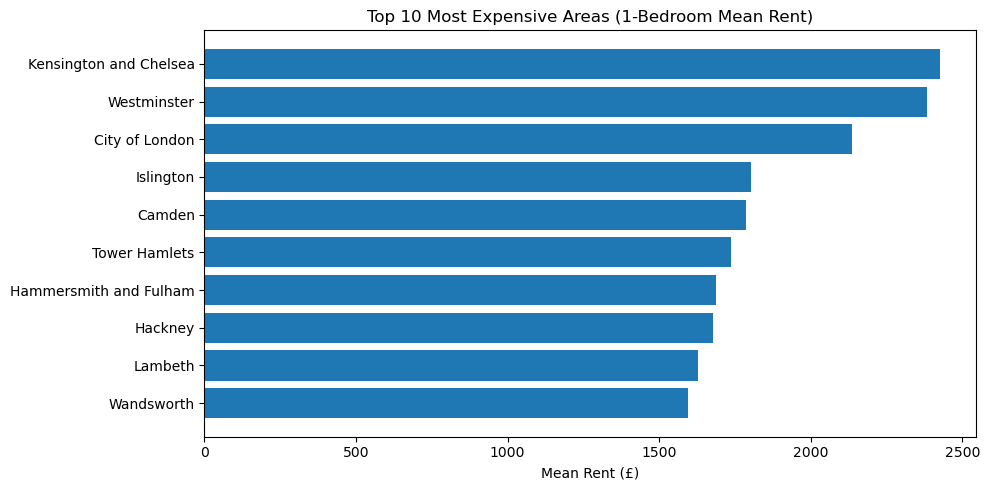

In [37]:
plt.figure(figsize=(10, 5))
plt.barh(top_10['Area'], top_10['Mean'])
plt.title("Top 10 Most Expensive Areas (1-Bedroom Mean Rent)")
plt.xlabel("Mean Rent (£)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

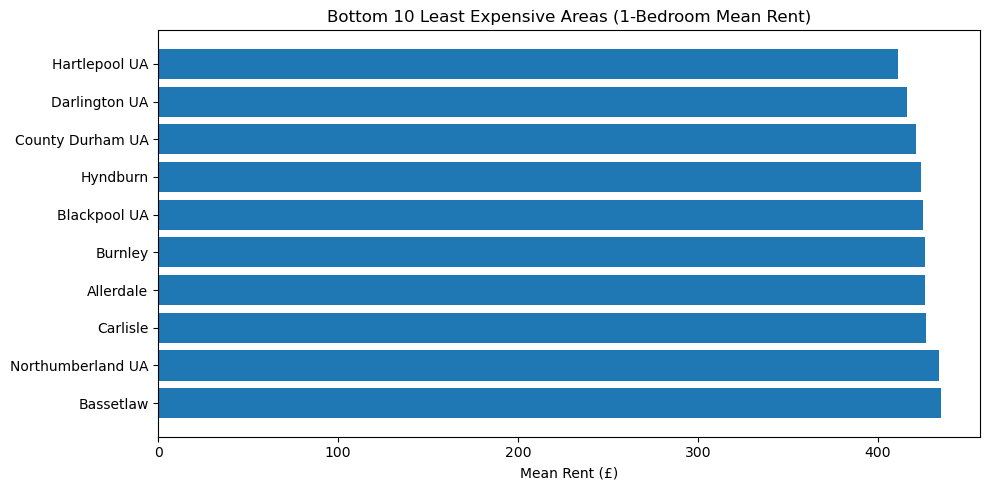

In [39]:
plt.figure(figsize=(10, 5))
plt.barh(bottom_10['Area'], bottom_10['Mean'])
plt.title("Bottom 10 Least Expensive Areas (1-Bedroom Mean Rent)")
plt.xlabel("Mean Rent (£)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [41]:
df_london = df_sorted[df_sorted['Area'].str.contains('London')]
df_rest = df_sorted[~df_sorted['Area'].str.contains('London')]

In [43]:
print("London Mean Rent:", df_london['Mean'].mean())
print("Rest of England Mean Rent:", df_rest['Mean'].mean())

London Mean Rent: 2137.0
Rest of England Mean Rent: 744.4935897435897


C:\Users\abirf\AppData\Local\Temp\ipykernel_27764\1959337987.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['London', 'Rest of England'])


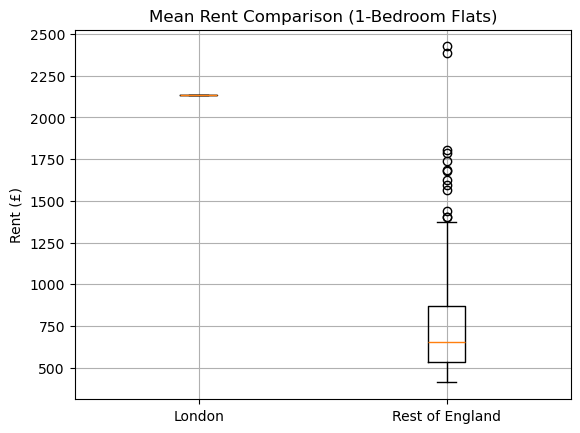

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

data = [df_london['Mean'], df_rest['Mean']]
plt.boxplot(data, labels=['London', 'Rest of England'])
plt.title("Mean Rent Comparison (1-Bedroom Flats)")
plt.ylabel("Rent (£)")
plt.grid(True)
plt.show()